<div class="alert alert-block alert-info">
    <h2>Week 10_Part 3. Mining Tweet Data Object</h2><br>
    <p>In this part, we'll harvest Twitter data by the root-level fields of the Tweet data object.</p>
</div>

In [1]:
# Load twython to your working environment if you opened a new .ipynb file.

from twython import Twython as tw


In [2]:
# If you continue from Part 2, no need to create variables for keys and tokens
# But if you are starting to code in a new .ipynb file, then you need to read in your keys and tokens again


myKey = 'your key'

mySecretKey = 'your secret key'

myToken = 'your token'

mySecretToken = 'your secret token'

In [4]:
# Establish a handshake with Twitter API for authentication

myTwitter = tw(myKey, mySecretKey,myToken, mySecretToken)


<div>
<h3>Tweets are also known as “status updates.” The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as <kbd>id</kbd>, <kbd>created_at</kbd>, and <kbd>text</kbd>.</h3><br>
<h3>Twitter API returns Tweets encoded as JavaScript Object Notation (JSON) objects. JSON is based on key-value pairs like Python dictionaries.</h3><br>

<img src="MapOfTweet.png"><br>

<h3>For more explanation on Twitter object and its structure, go to https://developer.twitter.com/en/docs/tweets/post-and-engage/overview</h3><br>
</div>

In [5]:
# Now let's mine what people tweet about Brexit.
# Set the q keyword argument to the #brexit topic

searchBx = myTwitter.search(q ='#brexit', count=200)

searchBx

{'statuses': [{'created_at': 'Sat Dec 12 16:35:51 +0000 2020',
   'id': 1337798330978623490,
   'id_str': '1337798330978623490',
   'text': 'Brexit idiot?\n#BrexitShambles #Brexit #FBPE https://t.co/Lk2SRndvVV',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'BrexitShambles', 'indices': [14, 29]},
     {'text': 'Brexit', 'indices': [30, 37]},
     {'text': 'FBPE', 'indices': [38, 43]}],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/Lk2SRndvVV',
      'expanded_url': 'https://twitter.com/Bobharris19775/status/1337797535046438915',
      'display_url': 'twitter.com/Bobharris19775…',
      'indices': [44, 67]}]},
   'metadata': {'iso_language_code': 'sv', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
  

In [6]:
# 'statuses' (plural) returns a collection of the most recent Tweets posted by the user indicated by 
# the screen_name or user_id parameters.

brexitTweets = searchBx['statuses']

brexitTweets

# to extract other data by data objects that the data dictionary contains, we'll need to loop

[{'created_at': 'Sat Dec 12 16:35:51 +0000 2020',
  'id': 1337798330978623490,
  'id_str': '1337798330978623490',
  'text': 'Brexit idiot?\n#BrexitShambles #Brexit #FBPE https://t.co/Lk2SRndvVV',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'BrexitShambles', 'indices': [14, 29]},
    {'text': 'Brexit', 'indices': [30, 37]},
    {'text': 'FBPE', 'indices': [38, 43]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/Lk2SRndvVV',
     'expanded_url': 'https://twitter.com/Bobharris19775/status/1337797535046438915',
     'display_url': 'twitter.com/Bobharris19775…',
     'indices': [44, 67]}]},
  'metadata': {'iso_language_code': 'sv', 'result_type': 'recent'},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 930753376995995650

In [7]:
# Twitter API tends to return only 100 tweets per page.

len(brexitTweets)

100

In [24]:
# Loop through the brexitTweet variable to print out id_str, tweet posts, favorite and retweet counts.

# Use the escape sequence \n to format the output so that the following data piece is displayed in a new line.

for tweet in brexitTweets:
    print(tweet['id_str'], '\n', tweet['text'], '\n', tweet['favorite_count'], '\n', tweet['retweet_count'])

1337798330978623490 
 Brexit idiot?
#BrexitShambles #Brexit #FBPE https://t.co/Lk2SRndvVV 
 0 
 0
1337798315073789953 
 RT @ManfredWeber: Dear friends in the United Kingdom, the world is full of enemies of the European way of life, our freedoms and our values… 
 0 
 19
1337798308085940225 
 RT @Anna_Soubry: And there’s all this ⬇️ #Brexit built on deceit, sold by liars 
 0 
 472
1337798266671534082 
 RT @DSheight: Had to do a factory wide brief today after the cleaner found a plastic bag of human faeces tied up &amp; stuffed under the pipewo… 
 0 
 2
1337798244102008833 
 RT @ScoPoliticsNews: '#Brexit has told Scots about the reality of devolution. It has confirmed, if it were in doubt, that power devolved is… 
 0 
 2
1337798240746545153 
 Meanwhile, back at UK Fisheries Protection HQ.....
#DefencePhotography #Fish #Brexit https://t.co/1XWiNSHElT 
 1 
 0
1337798238968180740 
 RT @PoliticsPollss: Boris Johnson has been accused of "irresponsible" behaviour akin to an "English nationalist

In [9]:
# Now that we iterated each tweet in the brexitTweets variable, we can check the data objects in the map of tweets

tweet.keys()


dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [10]:
# Let's use  a list comprehension construct to extract unique Ids
# Twitter Ids are unique 64-bit integers, which Twitter generates internally to assign to users
# Twitter Ids are based on time, instead of being sequential.
# ID values are returned in two formats: both as integers, and as strings so we'll search data by id strings

Ids = [tweet['id_str'] for tweet in brexitTweets]

Ids

['1337798330978623490',
 '1337798315073789953',
 '1337798308085940225',
 '1337798266671534082',
 '1337798244102008833',
 '1337798240746545153',
 '1337798238968180740',
 '1337798230000754689',
 '1337798220878065669',
 '1337798202553208843',
 '1337798184274366470',
 '1337798176884011012',
 '1337798170366136321',
 '1337798161205764098',
 '1337798136367116295',
 '1337798089298620420',
 '1337798088090595332',
 '1337798063491067907',
 '1337798059003179009',
 '1337798022579822598',
 '1337798008650477570',
 '1337798003025989634',
 '1337797986080919560',
 '1337797963444326401',
 '1337797944695721984',
 '1337797921580920836',
 '1337797919064416256',
 '1337797905416130562',
 '1337797903646142465',
 '1337797878543212553',
 '1337797872218238979',
 '1337797859366883336',
 '1337797789728858112',
 '1337797789644967936',
 '1337797784162996224',
 '1337797774318907394',
 '1337797763904512004',
 '1337797743398547458',
 '1337797681306066944',
 '1337797663807385602',
 '1337797654630330373',
 '13377976400299

In [11]:
# Use a list comprehension construct to extract the content of tweets

Texts = [tweet['text'] for tweet in brexitTweets]

Texts


['Brexit idiot?\n#BrexitShambles #Brexit #FBPE https://t.co/Lk2SRndvVV',
 'RT @ManfredWeber: Dear friends in the United Kingdom, the world is full of enemies of the European way of life, our freedoms and our values…',
 'RT @Anna_Soubry: And there’s all this ⬇️ #Brexit built on deceit, sold by liars',
 'RT @DSheight: Had to do a factory wide brief today after the cleaner found a plastic bag of human faeces tied up &amp; stuffed under the pipewo…',
 "RT @ScoPoliticsNews: '#Brexit has told Scots about the reality of devolution. It has confirmed, if it were in doubt, that power devolved is…",
 'Meanwhile, back at UK Fisheries Protection HQ.....\n#DefencePhotography #Fish #Brexit https://t.co/1XWiNSHElT',
 'RT @PoliticsPollss: Boris Johnson has been accused of "irresponsible" behaviour akin to an "English nationalist" after Royal Navy gunboats…',
 "RT @MrJunkerBarlow: How it started: Cameron's hubristic/inept attempt at party management. How it finished: Johnson - the perfect mendaciou…",
 

In [12]:
# Use a list comprehension construct to extract the time for each tweet

Times = [tweet['created_at'] for tweet in brexitTweets]

Times

# Check tweet.keys() above and extract other info by Twitter data objects, e.g. metadata, source, etc

['Sat Dec 12 16:35:51 +0000 2020',
 'Sat Dec 12 16:35:48 +0000 2020',
 'Sat Dec 12 16:35:46 +0000 2020',
 'Sat Dec 12 16:35:36 +0000 2020',
 'Sat Dec 12 16:35:31 +0000 2020',
 'Sat Dec 12 16:35:30 +0000 2020',
 'Sat Dec 12 16:35:29 +0000 2020',
 'Sat Dec 12 16:35:27 +0000 2020',
 'Sat Dec 12 16:35:25 +0000 2020',
 'Sat Dec 12 16:35:21 +0000 2020',
 'Sat Dec 12 16:35:16 +0000 2020',
 'Sat Dec 12 16:35:15 +0000 2020',
 'Sat Dec 12 16:35:13 +0000 2020',
 'Sat Dec 12 16:35:11 +0000 2020',
 'Sat Dec 12 16:35:05 +0000 2020',
 'Sat Dec 12 16:34:54 +0000 2020',
 'Sat Dec 12 16:34:53 +0000 2020',
 'Sat Dec 12 16:34:48 +0000 2020',
 'Sat Dec 12 16:34:47 +0000 2020',
 'Sat Dec 12 16:34:38 +0000 2020',
 'Sat Dec 12 16:34:35 +0000 2020',
 'Sat Dec 12 16:34:33 +0000 2020',
 'Sat Dec 12 16:34:29 +0000 2020',
 'Sat Dec 12 16:34:24 +0000 2020',
 'Sat Dec 12 16:34:19 +0000 2020',
 'Sat Dec 12 16:34:14 +0000 2020',
 'Sat Dec 12 16:34:13 +0000 2020',
 'Sat Dec 12 16:34:10 +0000 2020',
 'Sat Dec 12 16:34:0

In [26]:
# Alternatively, loop through brexitTweets to collect ids, retweet counts, and follower counts in one code block
# Inside the loop's scope, we'll use list comprehensions to extract all this data
# so no need to initialize empty lists to append all this data


for tweet in brexitTweets:
    Ids=[tweet['id_str'] for tweet in brexitTweets]
    Text=[tweet['text'] for tweet in brexitTweets]
    Retweets = [tweet['retweet_count'] for tweet in brexitTweets]
    Followers = [tweet['user']['followers_count'] for tweet in brexitTweets]


# first off, print out what you harvested and appended to the ids list.

Retweets
# call separately, other variables: texts, retweets and followers to view what they return in the output


[0,
 19,
 472,
 2,
 2,
 0,
 27,
 2,
 0,
 125,
 0,
 6,
 0,
 0,
 0,
 0,
 3,
 0,
 10,
 3,
 0,
 0,
 1,
 11,
 0,
 204,
 48,
 0,
 472,
 3,
 0,
 22,
 0,
 0,
 1,
 83,
 16,
 0,
 0,
 0,
 0,
 17,
 1,
 19,
 36,
 1,
 39,
 169,
 212,
 0,
 0,
 0,
 10,
 19,
 0,
 44,
 10,
 2,
 0,
 0,
 0,
 12,
 0,
 5,
 44,
 1,
 204,
 0,
 0,
 1,
 6,
 2,
 17,
 472,
 451,
 0,
 292,
 0,
 3,
 0,
 5,
 0,
 472,
 18,
 0,
 0,
 10,
 0,
 27,
 12,
 0,
 1580,
 174,
 6,
 0,
 3,
 0,
 12,
 44,
 1]

In [14]:
# Print out the text list you've created above. 

Text

['Brexit idiot?\n#BrexitShambles #Brexit #FBPE https://t.co/Lk2SRndvVV',
 'RT @ManfredWeber: Dear friends in the United Kingdom, the world is full of enemies of the European way of life, our freedoms and our values…',
 'RT @Anna_Soubry: And there’s all this ⬇️ #Brexit built on deceit, sold by liars',
 'RT @DSheight: Had to do a factory wide brief today after the cleaner found a plastic bag of human faeces tied up &amp; stuffed under the pipewo…',
 "RT @ScoPoliticsNews: '#Brexit has told Scots about the reality of devolution. It has confirmed, if it were in doubt, that power devolved is…",
 'Meanwhile, back at UK Fisheries Protection HQ.....\n#DefencePhotography #Fish #Brexit https://t.co/1XWiNSHElT',
 'RT @PoliticsPollss: Boris Johnson has been accused of "irresponsible" behaviour akin to an "English nationalist" after Royal Navy gunboats…',
 "RT @MrJunkerBarlow: How it started: Cameron's hubristic/inept attempt at party management. How it finished: Johnson - the perfect mendaciou…",
 

In [15]:
# In preparation for data modelling and viz, load matplotlib and pandas into your working environment.

import matplotlib.pyplot as plt
import pandas as pd


# Create a DataFrame that displays the counts of retweets in a structured way. 
# We'll use a dictionary container to name the column and assign the retweets list to a column.
# We extracted the retweets list in code line [13] by means of for loop.

retweetData = pd.DataFrame({'retweet counts':Retweets})

retweetData

,retweet counts
0,0
1,19
2,472
3,2
4,2
...,...
95,3
96,0
97,12
98,44


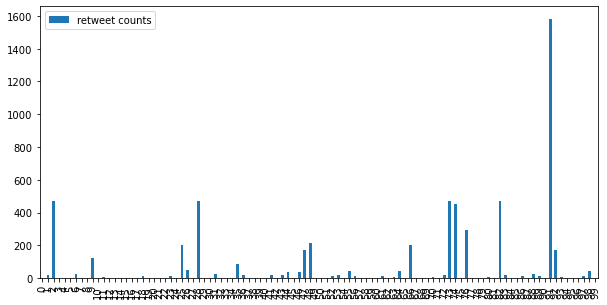

In [16]:
# Plot all retweets stored in retweetData variable as a bar plot.

retweetData.plot(kind='bar', figsize=(10,5))

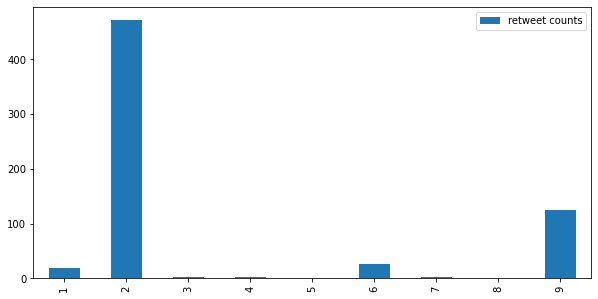

In [17]:
# Subselect first 10 retweets from retweetData and plot again as a bar plot.

retweetData[1:10].plot(kind='bar', figsize=(10,5))

In [18]:
# From what you harvested in code line [13], create a larger data set.
# When we looped there, we extracted 5 lists: ids, text, retweets, followers, and favorites.
# Put 4 of them up together into a DataFrame.
# Once again, we'll use the dictionary container to structure our data.

brexData = pd.DataFrame({'id': Ids, 'retweet counts': Retweets, 
                         'follower counts': Followers})



brexData

,id,retweet counts,follower counts
0,1337798330978623490,0,679
1,1337798315073789953,19,610
2,1337798308085940225,472,1000
3,1337798266671534082,2,3535
4,1337798244102008833,2,2557
...,...,...,...
95,1337797083500253186,3,292
96,1337797077951275008,0,27617
97,1337797068522459137,12,45
98,1337797032271077378,44,3464


In [27]:
# Get the top results of what you assigned to brexData with the .head() method.
# Then get the bottom results of brexData with the .tail) method. 


print(brexData.head(20))
print(brexData.tail())

# By default, both the head() and tail() methods will fetch 5 top or 5 bottom data entries.
# If you want to see more data entries, pass a specific number as an argument, e.g. brexData.tail(15)

                     id  retweet counts  follower counts
0   1337798330978623490               0              679
1   1337798315073789953              19              610
2   1337798308085940225             472             1000
3   1337798266671534082               2             3535
4   1337798244102008833               2             2557
5   1337798240746545153               0            18206
6   1337798238968180740              27             1786
7   1337798230000754689               2               22
8   1337798220878065669               0             1027
9   1337798202553208843             125            12373
10  1337798184274366470               0             3326
11  1337798176884011012               6              927
12  1337798170366136321               0              639
13  1337798161205764098               0               57
14  1337798136367116295               0             2837
15  1337798089298620420               0              639
16  1337798088090595332        

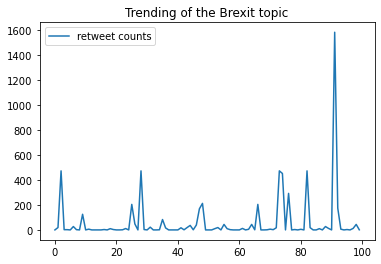

In [20]:
# A line plot is the most obvious choice to plot a trend.

trendFigure = brexData['retweet counts'].plot(kind='line', legend=True, 
                                              title='Trending of the Brexit topic')

In [21]:
# With get_figure(). create a figure object for the trendFigure visual and store it in the variable 'myfig'.

myfig = trendFigure.get_figure()

# As usual, use savefig() to export the image data to an external file.

myfig.savefig('BxRetweets.png')


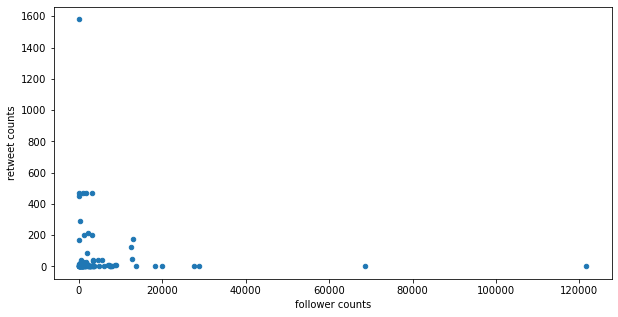

In [22]:
# Plot the correlation between follower and retweet counts as a scatter plot. 

# You may be getting a different visual depending on the live-streamed data.

brexData.plot(kind='scatter', x='follower counts', y='retweet counts', figsize=(10,5))

# Not much to observe here (no positive or negative trends) due to a small amount of data

<div style="background-color:#ccccff">
<h1>CONTINUE LEARNING</h1>
    <p>Check the <a href="https://twython.readthedocs.io/en/latest/index.html"><b>Twython documentation</b></a> for more twythonian tricks. To learn more about mining Twitter by its data objects, check the following Twython tutorial <a href="http://2017.compciv.org/guide/topics/python-nonstandard-libraries/twython-guide/twitter-twython-api-basics.html"><b>here</b></a>.</p><br>
<h3>NO MORE HOMEWORK BUT REVISION & PROJECT!</h3><br>
</div>